<div style='background-image: url("../share/images/header.svg") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">ObsPy Tutorial</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Introduction to File Formats and read/write in ObsPy</div>
        </div>
    </div>
</div>

Seismo-Live: http://seismo-live.org

##### Authors:
* Lion Krischer ([@krischer](https://github.com/krischer))
* Tobias Megies ([@megies](https://github.com/megies))

---

![](images/obspy_logo_full_524x179px.png)

This is oftentimes not taught, but fairly important to understand, at least at a basic level. This also teaches you how to work with these in ObsPy.

**This notebook aims to give a quick introductions to ObsPy's core functions and classes. Everything here will be repeated in more detail in later notebooks.**

In [1]:
from __future__ import print_function

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')



## SEED Identifiers

According to the  [SEED standard](www.fdsn.org/seed_manual/SEEDManual_V2.4.pdf), which is fairly well adopted, the following nomenclature is used to identify seismic receivers:

* **Network code**: Identifies the network/owner of the data. Assigned by the FDSN and thus unique.
* **Station code**: The station within a network. *NOT UNIQUE IN PRACTICE!* Always use together with a network code!
* **Location ID**: Identifies different data streams within one station. Commonly used to logically separate multiple instruments at a single station.
* **Channel codes**: Three character code: 1) Band and approximate sampling rate, 2) The type of instrument, 3) The orientation

This results in full ids of the form **NET.STA.LOC.CHAN**, e.g. **IV.PRMA..HHE**.


---


In seismology we generally distinguish between three separate types of data:

1. **Waveform Data** - The actual waveforms as time series.
2. **Station Data** - Information about the stations' operators, geographical locations, and the instrument's responses.
3. **Event Data** - Information about earthquakes.

Some formats have elements of two or more of these.

## Waveform Data

![stream](images/Stream_Trace.svg)

There are a myriad of waveform data formats but in Europe and the USA two formats dominate: **MiniSEED** and **SAC**


### MiniSEED

* This is what you get from datacenters and also what they store, thus the original data
* Can store integers and single/double precision floats
* Integer data (e.g. counts from a digitizer) are heavily compressed: a factor of 3-5 depending on the data
* Can deal with gaps and overlaps
* Multiple components per file
* Contains only the really necessary parameters and some information for the data providers

In [2]:
import obspy

# ObsPy automatically detects the file format.
st = obspy.read("data/example.mseed")
print(st)


6 Trace(s) in Stream:
IV.BDI..BHE | 2014-04-04T01:33:37.045000Z - 2014-04-04T02:15:10.695000Z | 20.0 Hz, 49874 samples
IV.BDI..BHE | 2014-04-04T02:15:23.535000Z - 2014-04-04T03:08:04.485000Z | 20.0 Hz, 63220 samples
IV.BDI..BHN | 2014-04-04T01:33:43.975000Z - 2014-04-04T02:15:12.125000Z | 20.0 Hz, 49764 samples
IV.BDI..BHN | 2014-04-04T02:15:22.725000Z - 2014-04-04T03:08:10.025000Z | 20.0 Hz, 63347 samples
IV.BDI..BHZ | 2014-04-04T01:33:26.745000Z - 2014-04-04T02:15:11.195000Z | 20.0 Hz, 50090 samples
IV.BDI..BHZ | 2014-04-04T02:15:24.025000Z - 2014-04-04T03:08:16.825000Z | 20.0 Hz, 63457 samples


In [3]:

# Fileformat specific information is stored here.
import numpy as np
max_values = []
for tr in st:
    #print(' ')
    #print(np.mean(tr.data), type(tr.data))
    max_values.append(np.mean(tr.data))
    print(tr.stats.starttime, type(tr.stats.starttime))
print(np.array(max_values))


2014-04-04T01:33:37.045000Z <class 'obspy.core.utcdatetime.UTCDateTime'>
2014-04-04T02:15:23.535000Z <class 'obspy.core.utcdatetime.UTCDateTime'>
2014-04-04T01:33:43.975000Z <class 'obspy.core.utcdatetime.UTCDateTime'>
2014-04-04T02:15:22.725000Z <class 'obspy.core.utcdatetime.UTCDateTime'>
2014-04-04T01:33:26.745000Z <class 'obspy.core.utcdatetime.UTCDateTime'>
2014-04-04T02:15:24.025000Z <class 'obspy.core.utcdatetime.UTCDateTime'>
[ 1352.32916951  1362.03604872  -112.69883852  -115.98183024
 -5207.03363945 -5194.92100162]


In [4]:

max_values2 = np.array([np.max(tr.data) for tr in st])
print(max_values2)

[ 2879  3388  1031  2781 -2623 -2790]


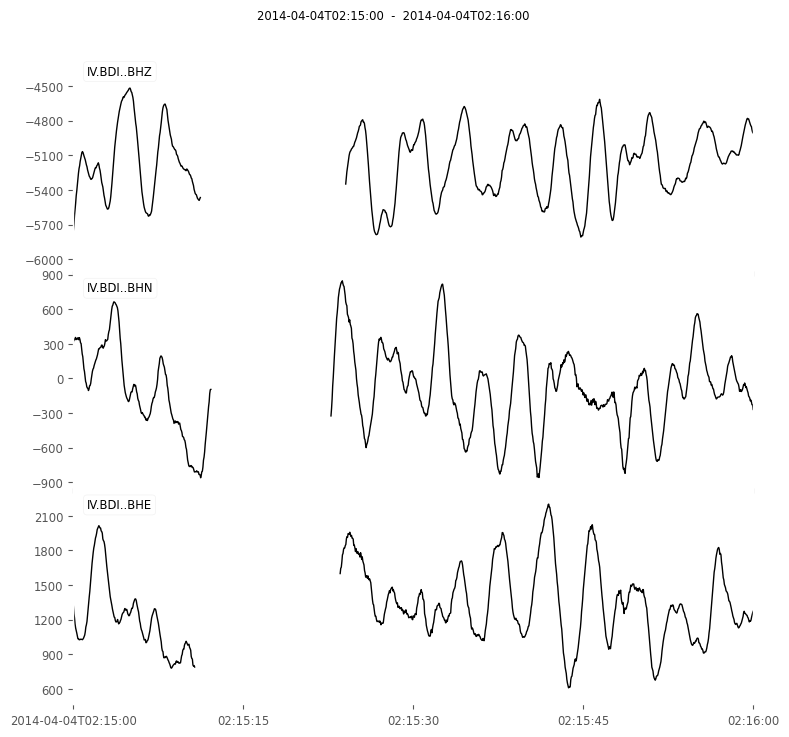

In [5]:
st.plot(starttime=obspy.UTCDateTime('2014-04-04T02:15:00'),
        endtime=obspy.UTCDateTime('2014-04-04T02:16:00'));

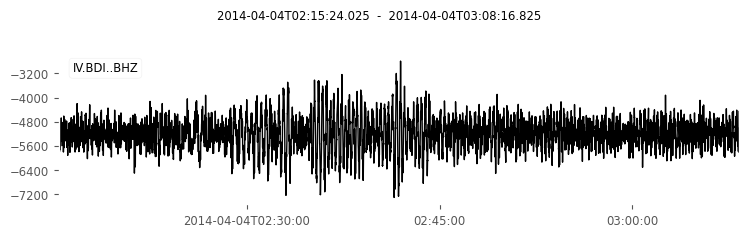

In [6]:
tr.plot();

In [7]:
# This is a quick interlude to teach you basics about how to work
# with Stream/Trace objects.

# Most operations work in-place, e.g. they modify the existing
# objects. We'll create a copy here.
print(st)
st2 = st.copy()
print(st2)

# To use only part of a Stream, use the select() function.
#print(st2.select(component="Z"))
st2.trim(starttime=obspy.core.UTCDateTime('2014-04-04T02:15:00'))
print(st2)
print(st)



6 Trace(s) in Stream:
IV.BDI..BHE | 2014-04-04T01:33:37.045000Z - 2014-04-04T02:15:10.695000Z | 20.0 Hz, 49874 samples
IV.BDI..BHE | 2014-04-04T02:15:23.535000Z - 2014-04-04T03:08:04.485000Z | 20.0 Hz, 63220 samples
IV.BDI..BHN | 2014-04-04T01:33:43.975000Z - 2014-04-04T02:15:12.125000Z | 20.0 Hz, 49764 samples
IV.BDI..BHN | 2014-04-04T02:15:22.725000Z - 2014-04-04T03:08:10.025000Z | 20.0 Hz, 63347 samples
IV.BDI..BHZ | 2014-04-04T01:33:26.745000Z - 2014-04-04T02:15:11.195000Z | 20.0 Hz, 50090 samples
IV.BDI..BHZ | 2014-04-04T02:15:24.025000Z - 2014-04-04T03:08:16.825000Z | 20.0 Hz, 63457 samples
6 Trace(s) in Stream:
IV.BDI..BHE | 2014-04-04T01:33:37.045000Z - 2014-04-04T02:15:10.695000Z | 20.0 Hz, 49874 samples
IV.BDI..BHE | 2014-04-04T02:15:23.535000Z - 2014-04-04T03:08:04.485000Z | 20.0 Hz, 63220 samples
IV.BDI..BHN | 2014-04-04T01:33:43.975000Z - 2014-04-04T02:15:12.125000Z | 20.0 Hz, 49764 samples
IV.BDI..BHN | 2014-04-04T02:15:22.725000Z - 2014-04-04T03:08:10.025000Z | 20.0 Hz, 

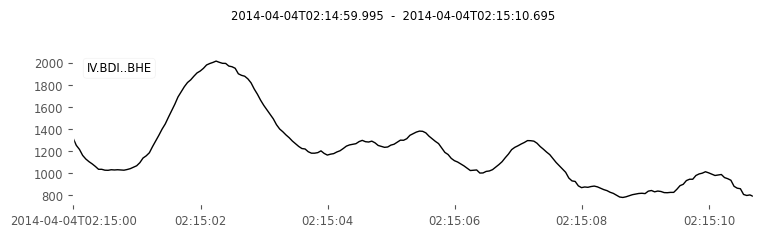

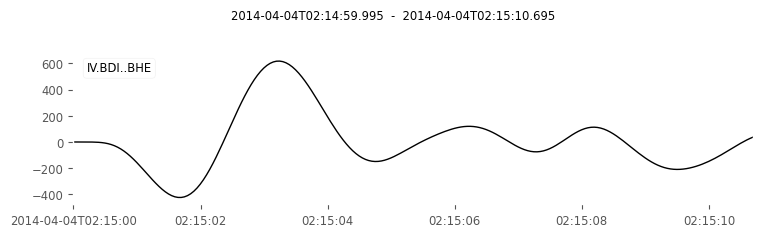

In [8]:

# Stream objects behave like a list of Trace objects.
tr = st2[0]

tr.plot();

# Some basic processing. Please note that these modify the
# existing object.
tr.detrend("linear")
tr.taper(type="hann", max_percentage=0.05)
tr.filter("lowpass", freq=0.5)

tr.plot();

In [9]:
# You can write it again by simply specifing the format.
st.write("temp.mseed", format="mseed")

### SAC

* Custom format of the `sac` code.
* Simple header and single precision floating point data.
* Only a single component per file and no concept of gaps/overlaps.
* Used a lot due to `sac` being very popular and the additional basic information that can be stored in the header.

In [10]:
st = obspy.read("data/example.sac")
print(st)
#print(st[0].stats)
st[0].stats.sac.__dict__

1 Trace(s) in Stream:
AI.BELA..BHN | 2010-03-11T06:17:18.000000Z - 2010-03-11T08:02:18.000000Z | 20.0 Hz, 126001 samples


{'delta': np.float32(0.05),
 'b': np.float32(0.0),
 'e': np.float32(6300.0),
 'internal0': np.float32(2.0),
 'stla': np.float32(-77.875),
 'stlo': np.float32(-34.6269),
 'stel': np.float32(262.0),
 'stdp': np.float32(0.0),
 'cmpaz': np.float32(0.0),
 'cmpinc': np.float32(90.0),
 'nzyear': np.int32(2010),
 'nzjday': np.int32(70),
 'nzhour': np.int32(6),
 'nzmin': np.int32(17),
 'nzsec': np.int32(18),
 'nzmsec': np.int32(0),
 'nvhdr': np.int32(6),
 'norid': np.int32(0),
 'nevid': np.int32(0),
 'npts': np.int32(126001),
 'iftype': np.int32(1),
 'idep': np.int32(5),
 'leven': np.int32(1),
 'lpspol': np.int32(0),
 'lcalda': np.int32(1),
 'unused23': np.int32(0),
 'kstnm': 'BELA',
 'khole': '',
 'kcmpnm': 'BHN',
 'knetwk': 'AI',
 'kevnm': ''}

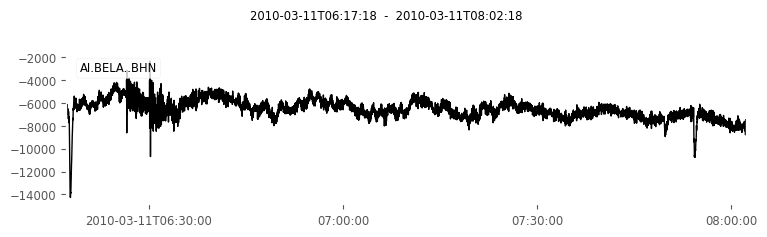

In [11]:
st.plot();

In [12]:
# You can once again write it with the write() method.
st.write("temp.sac", format="sac")

## Station Data

![inv](images/Inventory.svg)

Station data contains information about the organziation that collections the data, geographical information, as well as the instrument response. It mainly comes in three formats:

* `(dataless) SEED`: Very complete but pretty complex and binary. Still used a lot, e.g. for the Arclink protocol
* `RESP`: A strict subset of SEED. ASCII based. Contains **ONLY** the response.
* `StationXML`: Essentially like SEED but cleaner and based on XML. Most modern format and what the datacenters nowadays serve. **Use this if you can.**


ObsPy can work with all of them but today we will focus on StationXML.

They are XML files:

In [13]:
!head data/all_stations.xml

<?xml version="1.0" encoding="UTF-8"?>
<FDSNStationXML xmlns="http://www.fdsn.org/xml/station/1" schemaVersion="1.0">
  <Source>SeisComP3</Source>
  <Sender>INGV</Sender>
  <Created>2015-05-13T23:31:49</Created>
  <Network code="IV" startDate="1980-01-01T00:00:00" restrictedStatus="open">
    <Description>Italian Seismic Network</Description>
    <Station code="BDI" startDate="2003-03-01T00:00:00" restrictedStatus="open">
      <Latitude>44.06238</Latitude>
      <Longitude>10.59698</Longitude>


In [14]:
import obspy

# Use the read_inventory function to open them.
inv = obspy.read_inventory("data/all_stations.xml")
print(inv)

Inventory created at 2015-05-13T23:31:49.000000Z
	Sending institution: SeisComP3 (INGV)
	Contains:
		Networks (3):
			IV, MN, SI
		Stations (9):
			IV.BDI (BAGNI DI LUCCA)
			IV.BOB (BOBBIO)
			IV.CAVE (CAVE)
			IV.PESA (PESARO)
			IV.PRMA (Parma)
			IV.SALO (Salo)
			IV.TEOL (Teolo)
			MN.VLC (Villacollemandina, Italy)
			SI.LUSI (Lusi)
		Channels (47):
			IV.BDI..BHZ, IV.BDI..BHN, IV.BDI..BHE, IV.BDI..HHZ, IV.BDI..HHN, 
			IV.BDI..HHE, IV.BOB..BHZ, IV.BOB..BHN, IV.BOB..BHE, IV.BOB..HHZ, 
			IV.BOB..HHN, IV.BOB..HHE, IV.CAVE..HHZ, IV.CAVE..HHN, IV.CAVE..HHE
			IV.PESA..BHZ, IV.PESA..BHN, IV.PESA..BHE, IV.PESA..HHZ, 
			IV.PESA..HHN, IV.PESA..HHE, IV.PRMA..BHZ, IV.PRMA..BHN, 
			IV.PRMA..BHE, IV.PRMA..HHZ, IV.PRMA..HHN, IV.PRMA..HHE, 
			IV.SALO..BHZ, IV.SALO..BHN, IV.SALO..BHE, IV.SALO..HHZ, 
			IV.SALO..HHN, IV.SALO..HHE, IV.TEOL..BHZ, IV.TEOL..BHN, 
			IV.TEOL..BHE, IV.TEOL..HHZ, IV.TEOL..HHN, MN.VLC..BHZ, MN.VLC..BHN
			MN.VLC..BHE, MN.VLC..HHZ, MN.VLC..HHN, MN.VLC..HHE, SI.LUSI..H

You can see that they can contain an arbirary number of networks, stations, and channels.

In [15]:
# ObsPy is also able to plot a map of them.
inv.plot(projection="local");

/Users/thompsong/miniconda3/envs/compsci/lib/python3.11/site-packages/obspy/imaging/maps.py:37: UserWarning: Cartopy not installed, map plots will not work.
  warnings.warn(msg)


ImportError: Cartopy could not be imported.

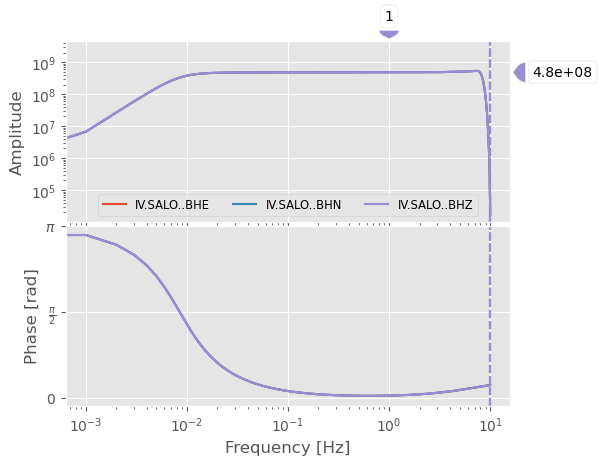

In [16]:
# As well as a plot the instrument response.
inv.select(network="IV", station="SALO", channel="BH?").plot_response(0.001);

In [19]:
# Coordinates of single channels can also be extraced. This function
# also takes a datetime arguments to extract information at different
# points in time.
inv.get_coordinates("IV.SALO..BHZ")

{'latitude': 45.6183,
 'longitude': 10.5243,
 'elevation': 600.0,
 'local_depth': 1.0}

In [25]:
print(inv.networks[0].stations[0].channels[0].response)

Channel Response
	From M/S () to COUNTS ()
	Overall Sensitivity: 1.5e+09 defined at 0.200 Hz
	6 stages:
		Stage 1: PolesZerosResponseStage from M/S to V, gain: 1500
		Stage 2: CoefficientsTypeResponseStage from V to COUNTS, gain: 1e+06
		Stage 3: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 4: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 5: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 6: FIRResponseStage from COUNTS to COUNTS, gain: 1


In [36]:
all_seed_ids = []
for net in inv.networks:
    print(net.code)
    for sta in net.stations:
        print(sta.code)
        for cha in sta.channels:
            print(cha.code)
            all_seed_ids.append('.'.join([net.code, sta.code, cha.code]))
            print(cha.response)
print(all_seed_ids)

IV
BDI
BHE
Channel Response
	From M/S () to COUNTS ()
	Overall Sensitivity: 1.5e+09 defined at 0.200 Hz
	6 stages:
		Stage 1: PolesZerosResponseStage from M/S to V, gain: 1500
		Stage 2: CoefficientsTypeResponseStage from V to COUNTS, gain: 1e+06
		Stage 3: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 4: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 5: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 6: FIRResponseStage from COUNTS to COUNTS, gain: 1
BHN
Channel Response
	From M/S () to COUNTS ()
	Overall Sensitivity: 1.5e+09 defined at 0.200 Hz
	6 stages:
		Stage 1: PolesZerosResponseStage from M/S to V, gain: 1500
		Stage 2: CoefficientsTypeResponseStage from V to COUNTS, gain: 1e+06
		Stage 3: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 4: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 5: FIRResponseStage from COUNTS to COUNTS, gain: 1
		Stage 6: FIRResponseStage from COUNTS to COUNTS, gain: 1
BHZ
Channel Response
	From M/S () to COUN

In [ ]:
# And it can naturally be written again, also in modified state.
inv.select(channel="BHZ").write("temp.xml", format="stationxml")

## Event Data

![events](./images/Event.svg)

Event data is essentially served in either very simple formats like NDK or the CMTSOLUTION format used by many waveform solvers:

In [37]:
!cat data/GCMT_2014_04_01__Mw_8_1

PDEW 2014  4  1 23 46 47.30 -19.6100  -70.7700  25.0 0.0 8.2 NEAR COAST OF NORTHERN C
event name:     201404012346A
time shift:     44.2000
half duration:  28.0000
latitude:      -19.7000
longitude:     -70.8100
depth:          21.6000
Mrr:       9.200000e+27
Mtt:      -3.900000e+26
Mpp:      -8.810000e+27
Mrt:       6.370000e+27
Mrp:      -1.530000e+28
Mtp:       2.050000e+27


Datacenters on the hand offer **QuakeML** files, which are surprisingly complex in structure but can store complex relations.

In [38]:
# Read QuakeML files with the read_events() function.
cat = obspy.read_events("data/GCMT_2014_04_01__Mw_8_1.xml")
print(cat)

1 Event(s) in Catalog:
2014-04-01T23:47:31.500000Z | -19.700,  -70.810 | 8.1  Mwc


In [ ]:
print(cat[0])


Event:	2014-04-01T23:47:31.500000Z | -19.700,  -70.810 | 8.1  Mwc

	                  resource_id: ResourceIdentifier(id="smi:service.iris.edu/fdsnws/event/1/query?eventid=4597319")
	                   event_type: 'earthquake'
	          preferred_origin_id: ResourceIdentifier(id="smi:www.iris.edu/spudservice/momenttensor/gcmtid/C201404012346A#cmtorigin")
	 preferred_focal_mechanism_id: ResourceIdentifier(id="smi:ds.iris.edu/spudservice/momenttensor/gcmtid/C201404012346A/quakeml#focalmechanism")
	                         ---------
	           event_descriptions: 1 Elements
	             focal_mechanisms: 1 Elements
	                      origins: 2 Elements
	                   magnitudes: 1 Elements
[Origin(resource_id=ResourceIdentifier(id="smi:www.iris.edu/spudservice/momenttensor/gcmtid/C201404012346A#reforigin"), time=UTCDateTime(2014, 4, 1, 23, 46, 47, 300000), longitude=-70.77, latitude=-19.61, depth=25000.0), Origin(resource_id=ResourceIdentifier(id="smi:www.iris.edu/spudservice

In [ ]:
for o in cat[0].origins:
    print(o)
for m in cat[0].magnitudes:
    print(m)
    print(o)


Origin
	 resource_id: ResourceIdentifier(id="smi:www.iris.edu/spudservice/momenttensor/gcmtid/C201404012346A#reforigin")
	        time: UTCDateTime(2014, 4, 1, 23, 46, 47, 300000)
	   longitude: -70.77
	    latitude: -19.61
	       depth: 25000.0
Origin
	     resource_id: ResourceIdentifier(id="smi:www.iris.edu/spudservice/momenttensor/gcmtid/C201404012346A#cmtorigin")
	            time: UTCDateTime(2014, 4, 1, 23, 47, 31, 500000)
	       longitude: -70.81
	        latitude: -19.7
	           depth: 21600.0
	      time_fixed: False
	 epicenter_fixed: False
Magnitude(resource_id=ResourceIdentifier(id="smi:ds.iris.edu/spudservice/momenttensor/gcmtid/C201404012346A/quakeml#magnitude"), mag=8.1, magnitude_type='Mwc')
Origin
	     resource_id: ResourceIdentifier(id="smi:www.iris.edu/spudservice/momenttensor/gcmtid/C201404012346A#cmtorigin")
	            time: UTCDateTime(2014, 4, 1, 23, 47, 31, 500000)
	       longitude: -70.81
	        latitude: -19.7
	           depth: 21600.0
	      time

In [45]:
for p in cat[0].picks:
    print(p)    

In [46]:
cat.plot(projection="ortho");

ImportError: Cartopy could not be imported.

In [ ]:
# Once again they can be written with the write() function.
cat.write("temp_quake.xml", format="quakeml")

To show off some more things, I added a file containing all events from 2014 in the GCMT catalog.

In [47]:
import obspy

cat = obspy.read_events("data/2014.ndk")

print(cat)

2463 Event(s) in Catalog:
2014-04-01T01:59:46.300000Z | -34.990, -108.410 | 4.79 Mwc
2014-04-01T05:05:57.500000Z | +48.940, -129.570 | 5.07 Mwc
...
2014-09-30T22:34:31.500000Z | -17.850, -178.590 | 5.46 Mwc
2014-09-30T23:23:01.500000Z | +56.740,  -34.460 | 4.91 Mwc
To see all events call 'print(CatalogObject.__str__(print_all=True))'


In [48]:
cat.plot(label=None)

ImportError: Cartopy could not be imported.

In [50]:
cot = cat.filter("depth > 40000", "magnitude > 7")
print(cot)
#cot.plot()

5 Event(s) in Catalog:
2014-04-11T07:07:33.900000Z |  -6.780, +155.090 | 7.07 Mwc
2014-04-19T13:28:12.800000Z |  -6.640, +154.670 | 7.51 Mwc
2014-06-23T20:53:33.700000Z | +52.000, +178.430 | 7.92 Mwc
2014-11-01T18:57:29.900000Z | -19.760, -177.610 | 7.11 Mwc
2014-11-15T02:31:49.800000Z |  +1.980, +126.370 | 7.05 Mwc


### Downloading
#### ObsPy has clients to directly fetch data via...

FDSN webservices (IRIS, Geofon/GFZ, USGS, NCEDC, SeisComp3 instances, ...)
Earthworm
SeedLink (near-realtime servers)
NERIES/NERA/seismicportal.eu
NEIC
Jane (local seismological database)
This introduction shows how to use the FDSN webservice client. The FDSN webservice definition is by now the default web service implemented by many data centers world wide. Clients for other protocols work similar to the FDSN client.

#### Waveform Data

In [ ]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

client = Client("IRIS")
t = UTCDateTime("2011-03-11T05:46:23")  # Tohoku
st = client.get_waveforms("II", "PFO", "*", "LHZ",
                          t + 10 * 60, t + 30 * 60)
print(st)
st.plot()

#### Station Metadata

In [ ]:
#event = catalog[0]
#origin = event.origins[0]

# Berhotel Sudelfeld
lon = 12.03625
lat = 47.6778
client = Client("IRIS")

inventory = client.get_stations(longitude=lon, latitude=lat,
                                maxradius=2.5, level="station")
print(inventory)

#### Event Data

In [ ]:
client = Client("EMSC")
t = UTCDateTime("2023-02-06")  # Turkey-Syria
catalog = client.get_events(starttime=t - 100, endtime=t + 24 * 3600,
                            minmagnitude=7)
print(catalog)
catalog.plot(method='cartopy')